In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [19]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualizing the images

Text(0.5, 1.0, '2')

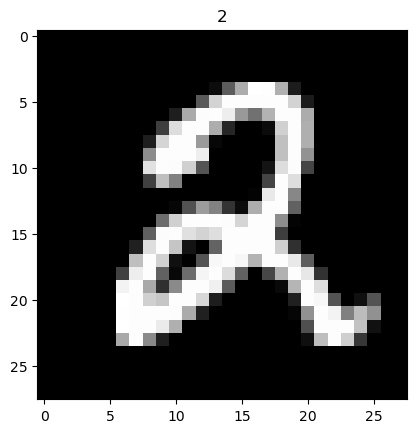

In [4]:
num = np.random.randint(0,60000)
plt.imshow(x_train[num], cmap = 'grey')
plt.title(y_train[num])

## Scaling the numbers

In [21]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(x_train.shape[0], 28*28 )
x_test = x_test.reshape(x_test.shape[0], 28*28 )

# Nural Networks

In [6]:
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

In [7]:
model = Sequential()
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

In [8]:
model.fit(x_train, y_train_nn, epochs =4)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8813 - loss: 0.4275
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9658 - loss: 0.1154
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0767
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9824 - loss: 0.0559


In [9]:
loss, nural_accuracy = model.evaluate(x_test, y_test_nn)
print(f"Accuracy using Nural Networks is {nural_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9745 - loss: 0.0925
Accuracy using Nural Networks is 0.9764000177383423


# SVM

In [10]:
svm = SVC(kernel='rbf', C=10, gamma=0.05)
svm.fit(x_train, y_train)


SVC(C=10, gamma=0.05)

In [11]:
y_pred_svm = svm.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Test accuracy: {svm_accuracy:.4f}")

Test accuracy: 0.9837


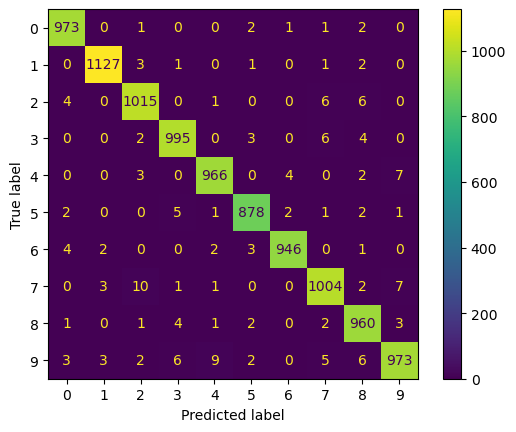

In [12]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()

In [13]:
svm_c_report = classification_report(y_test, y_pred_svm)
print(svm_c_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# K- Nearest Neighbors

In [ ]:
for k in [3,5,7,9,11]:
  knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
  knn.fit(x_train, y_train)

  y_pred_knn = knn.predict(x_test)

  knn_accuracy = accuracy_score(y_test, y_pred_knn)
  print(f"Test accuracy with k={k}: {knn_accuracy:.4f}")

In [ ]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Test accuracy with k={k}: {knn_accuracy:.4f}")

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()

In [ ]:
knn_c_report = classification_report(y_test, y_pred_knn)
print(knn_c_report)

# Accuracy
### Neural Network - 97.4 %
### SVM - 98.3 %
### K-Nearest Neighbour - 97.1 %


From the above accuracy score we can observe that all three have similar accuracy while SVM performs the best

There is no need to fine tune any models as they are already giving very high accuracy.